# Program 3 (`2.daphne`)

In [17]:
from evaluator import evaluate, ast_helper
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
i=2
fname='{}.daphne'.format(i)
exp = ast_helper(fname,directory='programs/')
%cat programs/2.daphne


(defn marsaglia-normal [mean var]
   (let [d (uniform-continuous -1.0 1.0)
         x (sample d)
         y (sample d)
         s (+ (* x x ) (* y y ))]
    (if (< s 1)
        (+ mean (* (sqrt var)
                   (* x (sqrt (* -2 (/ ( log s) s))))))
        (marsaglia-normal mean var))))

(let [mu (marsaglia-normal 1 5)
      sigma (sqrt 2)
      lik (normal mu sigma)]
  (observe lik 8)
  (observe lik 9)
  mu)


In [21]:
evaluate(exp, do_log=False) # example of the return

tensor(2.9357)

In [6]:
import sys
sys.setrecursionlimit(1000000)

In [ ]:
n_samples=1000*200
samples = [evaluate(exp).item() for sample in range(n_samples)]
# 10.2s / 1000 samples to 200k in 30 min

In [22]:
# np.save('program3.npy',np.array(samples))

Text(0.5, 1.0, '3.daphne \n n_samples 200000')

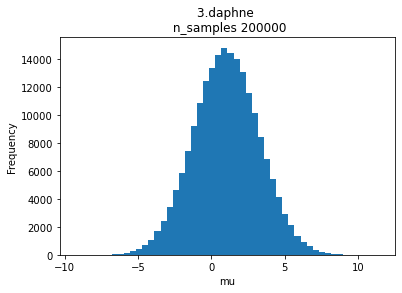

In [15]:
sr = pd.Series(samples)
sr.plot.hist(bins=50)
plt.xlabel('mu')
plt.title('{} \n n_samples {}'.format(fname,n_samples))

In [14]:
print('expectation w.r.t. the prior {:1.3f}'.format(sr.mean()))
print('std & var w.r.t. the prior {:1.3f} & {:1.1f}'.format(sr.std(),sr.var()))

expectation w.r.t. the prior 1.003
std & var w.r.t. the prior 2.239 & 5.0


The program follows its namesake, the [Marsaglia polar method](https://en.wikipedia.org/wiki/Marsaglia_polar_method), and so we know the distribution of the prior is $\mathcal{N}[\text{mu}|0,5]$. We can thus check that we are wtihin 5% tolerance.

In [20]:
gt_mean = 1
gt_var = 5

assert np.abs(gt_mean - sr.mean()) / gt_mean < 0.05
assert np.abs(gt_var - sr.var()) / gt_var < 0.05

**A normally distributed random quantity, via transformation and rejection. Take a little time to think about the sampled values of x and y and be amazed that this works. Think a little about how to deal with this kind of case in amortized inference settings.**

The prior is using control flow with the `if` statement, essentially rejection sampling to ensure (x,y) are "inside the unit circle".

So we can get a new type of distribution, a normal with two parameters, from just two continuous distributions x and y. 

In amortized inference, we could use some NN transformation of uniform RVs, to learn a new distribution. If the distribution was normal, perhaps they would learn the Marsaglia polar method, or some other method to sample from a Normal (the wiki page mentioned a few).

If our posterior was some arbitraty distribution, we could fit the parameters of the NN in amortized inference, and learn the custom transform for that posterior.